In [1]:
#!/usr/bin/env python3
"""
Test script to check if visual rendering works on your system
"""

import os
import sys
import time

def test_pygame():
    """Test basic pygame functionality"""
    print("🔍 Testing pygame...")
    
    try:
        import pygame
        print("✓ Pygame imported successfully")
        print(f"  Version: {pygame.version.ver}")
        
        # Initialize pygame
        pygame.init()
        print("✓ Pygame initialized")
        
        # Create a test window
        screen = pygame.display.set_mode((400, 300))
        pygame.display.set_caption("Rendering Test - Close this window")
        print("✓ Test window created")
        
        # Draw something
        screen.fill((0, 128, 255))  # Blue background
        pygame.draw.circle(screen, (255, 255, 0), (200, 150), 50)  # Yellow circle
        pygame.display.flip()
        
        print("✓ Graphics drawn - you should see a blue window with yellow circle")
        print("  The window will close automatically in 3 seconds...")
        
        # Keep window open for 3 seconds
        time.sleep(3)
        
        pygame.quit()
        print("✓ Pygame test completed successfully")
        return True
        
    except Exception as e:
        print(f"❌ Pygame test failed: {e}")
        return False

def test_minigrid_basic():
    """Test basic MiniGrid environment creation and rendering"""
    print("\n🔍 Testing MiniGrid rendering...")
    
    try:
        import gym
        import minigrid
        print("✓ MiniGrid imported")
        
        # Create a simple environment
        env = gym.make('MiniGrid-Empty-6x6-v0')
        print("✓ Environment created")
        
        # Reset and try to render
        env.reset()
        print("✓ Environment reset")
        
        # Try rendering with new API (no mode parameter)
        print("  Attempting to render...")
        try:
            env.render()  # New API
            print("✓ Render command executed - you should see a MiniGrid window")
        except Exception as e:
            print(f"❌ New API render failed: {e}")
            # Try old API as fallback
            try:
                env.render(mode='human')
                print("✓ Old API render worked - you should see a MiniGrid window")
            except Exception as e2:
                print(f"❌ Old API render also failed: {e2}")
                raise e2
        
        # Take a few random actions
        for i in range(5):
            action = env.action_space.sample()
            env.step(action)
            try:
                env.render()  # New API
            except:
                env.render(mode='human')  # Fallback
            time.sleep(0.5)
        
        print("✓ MiniGrid test completed")
        env.close()
        return True
        
    except Exception as e:
        print(f"❌ MiniGrid test failed: {e}")
        try:
            env.close()
        except:
            pass
        return False

def test_environment_variables():
    """Test and set environment variables for rendering"""
    print("\n🔍 Testing display environment...")
    
    # Check display variables
    if os.name == 'nt':  # Windows
        print("  Platform: Windows")
        os.environ['SDL_VIDEODRIVER'] = 'windib'
        print("  Set SDL_VIDEODRIVER=windib")
    else:  # Linux/Mac
        print(f"  Platform: {os.name}")
        if 'DISPLAY' in os.environ:
            print(f"  DISPLAY: {os.environ['DISPLAY']}")
        else:
            print("  DISPLAY not set - this might cause issues")
            os.environ['DISPLAY'] = ':0'
            print("  Set DISPLAY=:0")
    
    # Check if we're in a graphical environment
    try:
        import tkinter as tk
        root = tk.Tk()
        root.withdraw()  # Hide the window
        print("✓ Tkinter test passed - graphical environment available")
        root.destroy()
        return True
    except Exception as e:
        print(f"❌ Tkinter test failed: {e}")
        print("  This suggests no graphical environment is available")
        return False

def test_system_capabilities():
    """Test overall system rendering capabilities"""
    print("🔍 System Rendering Capability Test")
    print("=" * 50)
    
    # Test 1: Environment variables
    env_ok = test_environment_variables()
    
    # Test 2: Pygame
    pygame_ok = test_pygame()
    
    # Test 3: MiniGrid
    minigrid_ok = test_minigrid_basic()
    
    print("\n" + "=" * 50)
    print("📊 Test Results Summary:")
    print(f"  Environment Setup: {'✓' if env_ok else '❌'}")
    print(f"  Pygame Rendering:  {'✓' if pygame_ok else '❌'}")
    print(f"  MiniGrid Display:  {'✓' if minigrid_ok else '❌'}")
    
    if all([env_ok, pygame_ok, minigrid_ok]):
        print("\n🎉 All tests passed! Visual rendering should work.")
        print("   You can now run the visual game viewer.")
    elif pygame_ok:
        print("\n⚠️  Pygame works but MiniGrid rendering has issues.")
        print("   Try running: pip install --upgrade minigrid gymnasium")
    else:
        print("\n❌ Rendering issues detected.")
        print("   Try installing: pip install pygame")
        print("   On Linux, you might need: sudo apt-get install python3-pygame")

def install_dependencies():
    """Show installation commands for missing dependencies"""
    print("\n💡 If you see rendering issues, try these commands:")
    print("\n📦 Install/update required packages:")
    print("  pip install pygame")
    print("  pip install gymnasium[other]")
    print("  pip install --upgrade minigrid")
    
    if os.name != 'nt':  # Not Windows
        print("\n🐧 On Linux, you might also need:")
        print("  sudo apt-get install python3-pygame")
        print("  sudo apt-get install python3-tk")
        print("  export DISPLAY=:0")

if __name__ == "__main__":
    print("🧪 MiniGrid Visual Rendering Test")
    print("This will test if visual rendering works on your system")
    print()
    
    try:
        test_system_capabilities()
        install_dependencies()
        
        print("\n🚀 Next steps:")
        print("  If tests passed, run:")
        print("    python visual_game_viewer.py --env_name minigrid-crossing-stochastic")
        print("  To test rendering first:")
        print("    python visual_game_viewer.py --test_render")
        
    except KeyboardInterrupt:
        print("\n⏹ Test interrupted by user")
    except Exception as e:
        print(f"\n❌ Unexpected error: {e}")
        import traceback
        traceback.print_exc()

🧪 MiniGrid Visual Rendering Test
This will test if visual rendering works on your system

🔍 System Rendering Capability Test

🔍 Testing display environment...
  Platform: Windows
  Set SDL_VIDEODRIVER=windib
✓ Tkinter test passed - graphical environment available
🔍 Testing pygame...
pygame 2.6.1 (SDL 2.28.4, Python 3.9.0)
Hello from the pygame community. https://www.pygame.org/contribute.html
✓ Pygame imported successfully
  Version: 2.6.1
✓ Pygame initialized
✓ Test window created
✓ Graphics drawn - you should see a blue window with yellow circle
  The window will close automatically in 3 seconds...
✓ Pygame test completed successfully

🔍 Testing MiniGrid rendering...


C:\Users\Sam\Desktop\vit\.venv\lib\site-packages\gym\envs\registration.py:307: DeprecationWarning: The package name gym_minigrid has been deprecated in favor of minigrid. Please uninstall gym_minigrid and install minigrid with `pip install minigrid`. Future releases will be maintained under the new package name minigrid.
  fn()


✓ MiniGrid imported
✓ Environment created
✓ Environment reset
  Attempting to render...
✓ Render command executed - you should see a MiniGrid window


C:\Users\Sam\Desktop\vit\.venv\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


✓ MiniGrid test completed

📊 Test Results Summary:
  Environment Setup: ✓
  Pygame Rendering:  ✓
  MiniGrid Display:  ✓

🎉 All tests passed! Visual rendering should work.
   You can now run the visual game viewer.

💡 If you see rendering issues, try these commands:

📦 Install/update required packages:
  pip install pygame
  pip install gymnasium[other]
  pip install --upgrade minigrid

🚀 Next steps:
  If tests passed, run:
    python visual_game_viewer.py --env_name minigrid-crossing-stochastic
  To test rendering first:
    python visual_game_viewer.py --test_render


Image observation shape: (7, 7, 3)


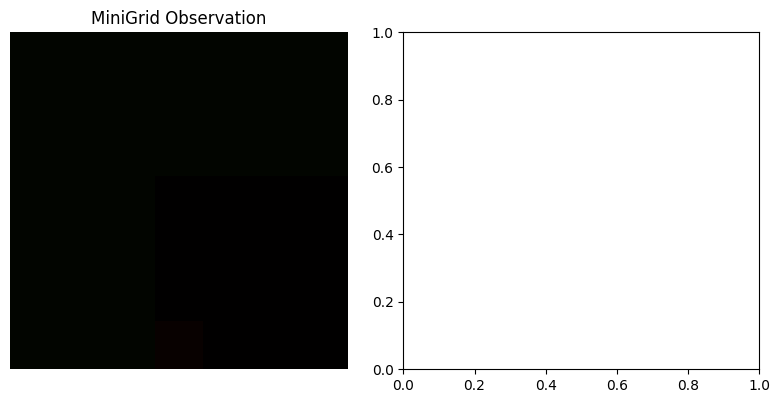

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# If observation is a dict (which is typical for MiniGrid)
if isinstance(obs, dict) and 'image' in obs:
    img_obs = obs['image']
    print(f"Image observation shape: {img_obs.shape}")
    
    # MiniGrid images are usually (height, width, channels)
    plt.figure(figsize=(8, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img_obs)
    plt.title("MiniGrid Observation")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    rendered = env.render()
    if rendered is not None:
        plt.imshow(rendered)
        plt.title("Environment Render")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    # If it's a direct array
    plt.imshow(obs)
    plt.title("Direct Observation")
    plt.show()

In [3]:
#!/usr/bin/env python3
"""
Model File Detective - Find and verify your trained models
"""

import os
import glob
import torch
from pathlib import Path

def search_all_model_files():
    """Search for all possible model files in the project"""
    print("🔍 Searching for all model files...")
    
    # Define search patterns
    patterns = [
        # Common patterns
        "**/*.pt",
        "**/*.pth", 
        "**/*model*.pt",
        "**/*model*.pth",
        "**/final_model*.pt",
        "**/complete_model*.pt",
        
        # Specific directories
        "./models/**/*.pt",
        "./model_free/models/**/*.pt",
        "./discrete_mbrl/models/**/*.pt",
        "./checkpoints/**/*.pt",
        "./runs/**/*.pt",
        "./experiments/**/*.pt",
    ]
    
    all_files = set()
    
    for pattern in patterns:
        try:
            files = glob.glob(pattern, recursive=True)
            all_files.update(files)
        except Exception as e:
            print(f"⚠️  Pattern {pattern} failed: {e}")
    
    if all_files:
        print(f"✓ Found {len(all_files)} model files:")
        for i, file_path in enumerate(sorted(all_files), 1):
            size_mb = os.path.getsize(file_path) / (1024 * 1024)
            mod_time = os.path.getmtime(file_path)
            import time
            mod_time_str = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(mod_time))
            print(f"  {i:2d}. {file_path}")
            print(f"      Size: {size_mb:.1f} MB, Modified: {mod_time_str}")
    else:
        print("❌ No model files found")
    
    return sorted(all_files)

def inspect_model_file(file_path):
    """Inspect the contents of a model file"""
    print(f"\n🔍 Inspecting: {file_path}")
    print("-" * 60)
    
    if not os.path.exists(file_path):
        print("❌ File does not exist!")
        return
    
    try:
        # Load the model file
        checkpoint = torch.load(file_path, map_location='cpu')
        
        print(f"✓ File loaded successfully")
        print(f"  File size: {os.path.getsize(file_path) / (1024*1024):.1f} MB")
        
        # Analyze contents
        if isinstance(checkpoint, dict):
            print(f"  Type: Dictionary with {len(checkpoint)} keys")
            print(f"  Keys: {list(checkpoint.keys())}")
            
            # Check for specific components
            components = {
                'autoencoder': ['ae_model_state_dict', 'encoder_state_dict'],
                'policy': ['policy_state_dict'],
                'critic': ['critic_state_dict'],
                'optimizer': ['optimizer_state_dict'],
                'training_info': ['step', 'epoch', 'avg_reward', 'args'],
                'model_info': ['model_info']
            }
            
            print("\n  📋 Components found:")
            for comp_name, possible_keys in components.items():
                found_keys = [key for key in possible_keys if key in checkpoint]
                if found_keys:
                    print(f"    ✓ {comp_name}: {found_keys}")
                    
                    # Show additional info for some components
                    if comp_name == 'training_info':
                        for key in found_keys:
                            if key in checkpoint:
                                value = checkpoint[key]
                                if key == 'avg_reward':
                                    print(f"      - {key}: {value:.4f}")
                                elif key == 'step':
                                    print(f"      - {key}: {value:,}")
                                elif key == 'args' and isinstance(value, dict):
                                    print(f"      - {key}: {len(value)} parameters")
                                else:
                                    print(f"      - {key}: {value}")
                else:
                    print(f"    ❌ {comp_name}: Not found")
            
            # Check model parameter counts
            print("\n  📊 Model sizes:")
            state_dict_keys = [k for k in checkpoint.keys() if 'state_dict' in k]
            for key in state_dict_keys:
                state_dict = checkpoint[key]
                if isinstance(state_dict, dict):
                    param_count = sum(p.numel() for p in state_dict.values() if hasattr(p, 'numel'))
                    print(f"    {key}: {param_count:,} parameters")
        
        else:
            print(f"  Type: {type(checkpoint)}")
            if hasattr(checkpoint, 'state_dict'):
                print(f"  Has state_dict: {len(checkpoint.state_dict())} parameters")
    
    except Exception as e:
        print(f"❌ Error loading file: {e}")
        print(f"   This might not be a valid PyTorch model file")

def check_directory_structure():
    """Check the directory structure around model files"""
    print("\n🗂️  Directory Structure Analysis:")
    print("-" * 60)
    
    # Check common model directories
    dirs_to_check = [
        "./models",
        "./model_free/models", 
        "./discrete_mbrl/models",
        "./checkpoints",
        "./runs",
        "./experiments"
    ]
    
    for dir_path in dirs_to_check:
        if os.path.exists(dir_path):
            print(f"✓ {dir_path}/")
            try:
                items = os.listdir(dir_path)
                if items:
                    for item in sorted(items)[:10]:  # Show first 10 items
                        item_path = os.path.join(dir_path, item)
                        if os.path.isdir(item_path):
                            print(f"    📁 {item}/")
                        else:
                            print(f"    📄 {item}")
                    if len(items) > 10:
                        print(f"    ... and {len(items) - 10} more items")
                else:
                    print(f"    (empty)")
            except PermissionError:
                print(f"    (permission denied)")
        else:
            print(f"❌ {dir_path}/ (does not exist)")

def suggest_fixes(all_files):
    """Suggest fixes based on what was found"""
    print("\n💡 Suggestions:")
    print("-" * 60)
    
    if not all_files:
        print("❌ No model files found at all!")
        print("\n🔧 Possible issues:")
        print("  1. Models weren't saved during training (missing --save flag)")
        print("  2. Models are in a different location")
        print("  3. Training didn't complete successfully")
        print("\n🚀 Solutions:")
        print("  1. Re-run training with: python train.py -e minigrid-crossing-stochastic -s")
        print("  2. Check if training completed without errors")
        print("  3. Look for models in your training output directory")
        return
    
    # Check for final models
    final_models = [f for f in all_files if 'final' in f.lower()]
    complete_models = [f for f in all_files if 'complete' in f.lower()]
    
    if final_models:
        print("✓ Found final models:")
        for model in final_models:
            print(f"    {model}")
        print(f"\n🎯 Use this path:")
        print(f"    python visual_game_viewer.py --model_path '{final_models[0]}'")
    elif complete_models:
        print("✓ Found complete models:")
        for model in complete_models:
            print(f"    {model}")
        print(f"\n🎯 Use this path:")
        print(f"    python visual_game_viewer.py --model_path '{complete_models[0]}'")
    else:
        print("⚠️  Found model files but no 'final' or 'complete' models")
        recent_models = sorted(all_files, key=lambda x: os.path.getmtime(x), reverse=True)
        print("📅 Most recent models:")
        for model in recent_models[:3]:
            print(f"    {model}")
        print(f"\n🎯 Try the most recent:")
        print(f"    python visual_game_viewer.py --model_path '{recent_models[0]}'")

def interactive_model_inspector():
    """Interactive model file inspector"""
    all_files = search_all_model_files()
    check_directory_structure()
    
    if all_files:
        print(f"\n🔍 Found {len(all_files)} model files. Which would you like to inspect?")
        print("   Enter number (1-{}) or 'all' to inspect all files:".format(len(all_files)))
        
        try:
            choice = input("Choice: ").strip().lower()
            
            if choice == 'all':
                for file_path in all_files:
                    inspect_model_file(file_path)
            elif choice.isdigit():
                idx = int(choice) - 1
                if 0 <= idx < len(all_files):
                    inspect_model_file(all_files[idx])
                else:
                    print("❌ Invalid choice")
            else:
                print("❌ Invalid input")
        except KeyboardInterrupt:
            print("\n⏹ Interrupted")
    
    suggest_fixes(all_files)

def main():
    """Main function"""
    print("🕵️ Model File Detective")
    print("=" * 60)
    print("This script will help you find and verify your trained models")
    print()
    
    try:
        interactive_model_inspector()
        
        print("\n" + "=" * 60)
        print("🎯 Next Steps:")
        print("  1. Use the suggested model path with --model_path")
        print("  2. If no models found, re-run training with --save flag")
        print("  3. Check that training completed successfully")
        
    except Exception as e:
        print(f"❌ Unexpected error: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

🕵️ Model File Detective
This script will help you find and verify your trained models

🔍 Searching for all model files...
✓ Found 2 model files:
   1. ./model_free/models\minigrid-crossing-stochastic\final_model_reward_0.0000.pt
      Size: 15.0 MB, Modified: 2025-06-26 04:41:08
   2. model_free\models\minigrid-crossing-stochastic\final_model_reward_0.0000.pt
      Size: 15.0 MB, Modified: 2025-06-26 04:41:08

🗂️  Directory Structure Analysis:
------------------------------------------------------------
❌ ./models/ (does not exist)
✓ ./model_free/models/
    📁 minigrid-crossing-stochastic/
❌ ./discrete_mbrl/models/ (does not exist)
❌ ./checkpoints/ (does not exist)
❌ ./runs/ (does not exist)
❌ ./experiments/ (does not exist)

🔍 Found 2 model files. Which would you like to inspect?
   Enter number (1-2) or 'all' to inspect all files:
❌ Invalid input

💡 Suggestions:
------------------------------------------------------------
✓ Found final models:
    ./model_free/models\minigrid-crossin

In [4]:
#!/usr/bin/env python3
"""
Test script to check if visual rendering works on your system
"""

import os
import sys
import time

def test_pygame():
    """Test basic pygame functionality"""
    print("🔍 Testing pygame...")
    
    try:
        import pygame
        print("✓ Pygame imported successfully")
        print(f"  Version: {pygame.version.ver}")
        
        # Initialize pygame
        pygame.init()
        print("✓ Pygame initialized")
        
        # Create a test window
        screen = pygame.display.set_mode((400, 300))
        pygame.display.set_caption("Rendering Test - Close this window")
        print("✓ Test window created")
        
        # Draw something
        screen.fill((0, 128, 255))  # Blue background
        pygame.draw.circle(screen, (255, 255, 0), (200, 150), 50)  # Yellow circle
        pygame.display.flip()
        
        print("✓ Graphics drawn - you should see a blue window with yellow circle")
        print("  The window will close automatically in 3 seconds...")
        
        # Keep window open for 3 seconds
        time.sleep(3)
        
        pygame.quit()
        print("✓ Pygame test completed successfully")
        return True
        
    except Exception as e:
        print(f"❌ Pygame test failed: {e}")
        return False

def test_minigrid_basic():
    """Test basic MiniGrid environment creation and rendering"""
    print("\n🔍 Testing MiniGrid rendering...")
    
    try:
        import gym
        import minigrid
        print("✓ MiniGrid imported")
        
        # Create a simple environment
        env = gym.make('MiniGrid-Empty-6x6-v0')
        print("✓ Environment created")
        
        # Reset and try to render
        env.reset()
        print("✓ Environment reset")
        
        # Try rendering
        print("  Attempting to render...")
        env.render(mode='human')
        print("✓ Render command executed - you should see a MiniGrid window")
        
        # Take a few random actions
        for i in range(5):
            action = env.action_space.sample()
            env.step(action)
            env.render(mode='human')
            time.sleep(0.5)
        
        print("✓ MiniGrid test completed")
        env.close()
        return True
        
    except Exception as e:
        print(f"❌ MiniGrid test failed: {e}")
        try:
            env.close()
        except:
            pass
        return False

def test_environment_variables():
    """Test and set environment variables for rendering"""
    print("\n🔍 Testing display environment...")
    
    # Check display variables
    if os.name == 'nt':  # Windows
        print("  Platform: Windows")
        os.environ['SDL_VIDEODRIVER'] = 'windib'
        print("  Set SDL_VIDEODRIVER=windib")
    else:  # Linux/Mac
        print(f"  Platform: {os.name}")
        if 'DISPLAY' in os.environ:
            print(f"  DISPLAY: {os.environ['DISPLAY']}")
        else:
            print("  DISPLAY not set - this might cause issues")
            os.environ['DISPLAY'] = ':0'
            print("  Set DISPLAY=:0")
    
    # Check if we're in a graphical environment
    try:
        import tkinter as tk
        root = tk.Tk()
        root.withdraw()  # Hide the window
        print("✓ Tkinter test passed - graphical environment available")
        root.destroy()
        return True
    except Exception as e:
        print(f"❌ Tkinter test failed: {e}")
        print("  This suggests no graphical environment is available")
        return False

def test_system_capabilities():
    """Test overall system rendering capabilities"""
    print("🔍 System Rendering Capability Test")
    print("=" * 50)
    
    # Test 1: Environment variables
    env_ok = test_environment_variables()
    
    # Test 2: Pygame
    pygame_ok = test_pygame()
    
    # Test 3: MiniGrid
    minigrid_ok = test_minigrid_basic()
    
    print("\n" + "=" * 50)
    print("📊 Test Results Summary:")
    print(f"  Environment Setup: {'✓' if env_ok else '❌'}")
    print(f"  Pygame Rendering:  {'✓' if pygame_ok else '❌'}")
    print(f"  MiniGrid Display:  {'✓' if minigrid_ok else '❌'}")
    
    if all([env_ok, pygame_ok, minigrid_ok]):
        print("\n🎉 All tests passed! Visual rendering should work.")
        print("   You can now run the visual game viewer.")
    elif pygame_ok:
        print("\n⚠️  Pygame works but MiniGrid rendering has issues.")
        print("   Try running: pip install --upgrade minigrid gymnasium")
    else:
        print("\n❌ Rendering issues detected.")
        print("   Try installing: pip install pygame")
        print("   On Linux, you might need: sudo apt-get install python3-pygame")

def install_dependencies():
    """Show installation commands for missing dependencies"""
    print("\n💡 If you see rendering issues, try these commands:")
    print("\n📦 Install/update required packages:")
    print("  pip install pygame")
    print("  pip install gymnasium[other]")
    print("  pip install --upgrade minigrid")
    
    if os.name != 'nt':  # Not Windows
        print("\n🐧 On Linux, you might also need:")
        print("  sudo apt-get install python3-pygame")
        print("  sudo apt-get install python3-tk")
        print("  export DISPLAY=:0")

if __name__ == "__main__":
    print("🧪 MiniGrid Visual Rendering Test")
    print("This will test if visual rendering works on your system")
    print()
    
    try:
        test_system_capabilities()
        install_dependencies()
        
        print("\n🚀 Next steps:")
        print("  If tests passed, run:")
        print("    python visual_game_viewer.py --env_name minigrid-crossing-stochastic")
        print("  To test rendering first:")
        print("    python visual_game_viewer.py --test_render")
        
    except KeyboardInterrupt:
        print("\n⏹ Test interrupted by user")
    except Exception as e:
        print(f"\n❌ Unexpected error: {e}")
        import traceback
        traceback.print_exc()

🧪 MiniGrid Visual Rendering Test
This will test if visual rendering works on your system

🔍 System Rendering Capability Test

🔍 Testing display environment...
  Platform: Windows
  Set SDL_VIDEODRIVER=windib
✓ Tkinter test passed - graphical environment available
🔍 Testing pygame...
✓ Pygame imported successfully
  Version: 2.6.1
✓ Pygame initialized
✓ Test window created
✓ Graphics drawn - you should see a blue window with yellow circle
  The window will close automatically in 3 seconds...
✓ Pygame test completed successfully

🔍 Testing MiniGrid rendering...
✓ MiniGrid imported
✓ Environment created
✓ Environment reset
  Attempting to render...
❌ MiniGrid test failed: render() got an unexpected keyword argument 'mode'

📊 Test Results Summary:
  Environment Setup: ✓
  Pygame Rendering:  ✓
  MiniGrid Display:  ❌

⚠️  Pygame works but MiniGrid rendering has issues.
   Try running: pip install --upgrade minigrid gymnasium

💡 If you see rendering issues, try these commands:

📦 Install/upda

In [1]:
#!/usr/bin/env python3
"""
Check PyTorch installation and CUDA availability
"""

import torch
import sys

def check_pytorch_setup():
    """Check PyTorch installation details"""
    print("=== PyTorch Setup Check ===")
    print(f"PyTorch version: {torch.__version__}")
    print(f"Python version: {sys.version}")

    # Check CUDA availability
    print(f"\nCUDA available: {torch.cuda.is_available()}")
    if torch.cuda.is_available():
        print(f"CUDA version: {torch.version.cuda}")
        print(f"Number of GPUs: {torch.cuda.device_count()}")
        for i in range(torch.cuda.device_count()):
            print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    else:
        print("CUDA not available - using CPU")

    # Check what device would be used by default
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Default device: {device}")

    # Test basic tensor operations
    print(f"\n=== Testing tensor operations ===")
    try:
        # Test CPU
        x = torch.randn(3, 3)
        print(f"CPU tensor created: {x.shape}")

        # Test GPU if available
        if torch.cuda.is_available():
            x_gpu = x.cuda()
            print(f"GPU tensor created: {x_gpu.shape}")
            print("GPU operations working!")
        else:
            print("No GPU available for testing")

    except Exception as e:
        print(f"Error in tensor operations: {e}")

    # Recommendations
    print(f"\n=== Recommendations ===")
    if torch.cuda.is_available():
        print("✅ CUDA is available - you can use --device cuda")
    else:
        print("⚠️  CUDA not available")
        print("   Recommendation: Use --device cpu for training")
        print("   Or install CUDA-enabled PyTorch if you have a compatible GPU")
        print("   Visit: https://pytorch.org/get-started/locally/")

if __name__ == "__main__":
    check_pytorch_setup()

=== PyTorch Setup Check ===
PyTorch version: 2.7.1+cpu
Python version: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]

CUDA available: False
CUDA not available - using CPU
Default device: cpu

=== Testing tensor operations ===
CPU tensor created: torch.Size([3, 3])
No GPU available for testing

=== Recommendations ===
⚠️  CUDA not available
   Recommendation: Use --device cpu for training
   Or install CUDA-enabled PyTorch if you have a compatible GPU
   Visit: https://pytorch.org/get-started/locally/


In [2]:
#!/usr/bin/env python3
"""
Check CUDA compatibility and recommend the right PyTorch installation
"""

import subprocess
import sys
import platform
import re

def run_command(cmd):
    """Run a command and return output"""
    try:
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        return result.stdout.strip(), result.stderr.strip(), result.returncode
    except Exception as e:
        return "", str(e), 1

def check_nvidia_gpu():
    """Check if NVIDIA GPU is present"""
    print("=== GPU Detection ===")

    # Check nvidia-smi
    stdout, stderr, code = run_command("nvidia-smi")
    if code == 0:
        print("✅ NVIDIA GPU detected!")
        print("nvidia-smi output:")
        print(stdout[:500] + "..." if len(stdout) > 500 else stdout)
        return True
    else:
        print("❌ No NVIDIA GPU found or nvidia-smi not available")
        print("You may have:")
        print("  - No NVIDIA GPU")
        print("  - NVIDIA drivers not installed")
        print("  - AMD/Intel GPU (not compatible with CUDA)")
        return False

def check_cuda_version():
    """Check installed CUDA version"""
    print("\n=== CUDA Installation Check ===")

    # Check nvcc (CUDA compiler)
    stdout, stderr, code = run_command("nvcc --version")
    if code == 0:
        print("✅ CUDA toolkit found!")
        print(stdout)

        # Extract CUDA version
        version_match = re.search(r'release (\d+\.\d+)', stdout)
        if version_match:
            cuda_version = version_match.group(1)
            print(f"CUDA Version: {cuda_version}")
            return cuda_version
    else:
        print("❌ CUDA toolkit not found")
        print("nvcc command not available")

    # Alternative: Check CUDA runtime version via nvidia-smi
    stdout, stderr, code = run_command("nvidia-smi")
    if code == 0:
        version_match = re.search(r'CUDA Version: (\d+\.\d+)', stdout)
        if version_match:
            cuda_version = version_match.group(1)
            print(f"CUDA Runtime Version (from nvidia-smi): {cuda_version}")
            return cuda_version

    return None

def get_pytorch_recommendations(cuda_version=None, has_gpu=False):
    """Get PyTorch installation recommendations"""
    print("\n=== PyTorch Installation Recommendations ===")

    if not has_gpu:
        print("🔍 No NVIDIA GPU detected")
        print("Recommendation: Install CPU-only PyTorch")
        print("\nInstall command:")
        print("pip install torch torchvision torchaudio")
        return

    if not cuda_version:
        print("🔍 GPU detected but CUDA not properly installed")
        print("Steps:")
        print("1. Install CUDA toolkit from: https://developer.nvidia.com/cuda-downloads")
        print("2. Then install PyTorch with CUDA support")
        return

    # Parse CUDA version
    try:
        major, minor = map(int, cuda_version.split('.'))
        cuda_major_minor = f"{major}.{minor}"
    except:
        print(f"Could not parse CUDA version: {cuda_version}")
        return

    print(f"🎯 CUDA {cuda_version} detected")

    # PyTorch CUDA compatibility mapping (as of 2024)
    recommendations = {
        "11.8": {
            "pytorch_cuda": "cu118",
            "command": "pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118"
        },
        "12.1": {
            "pytorch_cuda": "cu121",
            "command": "pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121"
        },
        "12.4": {
            "pytorch_cuda": "cu124",
            "command": "pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124"
        }
    }

    # Find best match
    best_match = None
    if cuda_major_minor in recommendations:
        best_match = cuda_major_minor
    elif major == 11:
        best_match = "11.8"  # Use 11.8 for CUDA 11.x
    elif major == 12:
        if minor >= 4:
            best_match = "12.4"
        else:
            best_match = "12.1"

    if best_match:
        rec = recommendations[best_match]
        print(f"✅ Recommended PyTorch CUDA version: {rec['pytorch_cuda']}")
        print(f"\nInstall command:")
        print(rec['command'])

        if best_match != cuda_major_minor:
            print(f"\n⚠️  Note: Using PyTorch CUDA {best_match} for your CUDA {cuda_version}")
            print("This should work fine - PyTorch versions are usually backward compatible")
    else:
        print(f"⚠️  CUDA {cuda_version} - no direct PyTorch support found")
        print("Try the latest available:")
        print("pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121")

    # Always provide CPU fallback
    print(f"\n💡 If you have issues, you can always use CPU:")
    print("pip install torch torchvision torchaudio")

def check_current_pytorch():
    """Check current PyTorch installation"""
    print("\n=== Current PyTorch Status ===")
    try:
        import torch
        print(f"✅ PyTorch {torch.__version__} installed")
        print(f"CUDA available: {torch.cuda.is_available()}")
        if torch.cuda.is_available():
            print(f"PyTorch CUDA version: {torch.version.cuda}")
            print(f"Number of GPUs: {torch.cuda.device_count()}")
        else:
            print("PyTorch compiled without CUDA support")
    except ImportError:
        print("❌ PyTorch not installed")

def main():
    """Main compatibility check"""
    print("🔍 CUDA Compatibility Checker for PyTorch")
    print("==========================================")

    print(f"System: {platform.system()} {platform.release()}")
    print(f"Python: {sys.version}")

    # Check for GPU
    has_gpu = check_nvidia_gpu()

    # Check CUDA version
    cuda_version = check_cuda_version()

    # Check current PyTorch
    check_current_pytorch()

    # Get recommendations
    get_pytorch_recommendations(cuda_version, has_gpu)

    print("\n=== Next Steps ===")
    if has_gpu and cuda_version:
        print("1. Uninstall current PyTorch: pip uninstall torch torchvision torchaudio")
        print("2. Install CUDA-enabled PyTorch using the command above")
        print("3. Test with: python -c \"import torch; print(torch.cuda.is_available())\"")
    elif has_gpu and not cuda_version:
        print("1. Install CUDA toolkit from https://developer.nvidia.com/cuda-downloads")
        print("2. Restart your terminal/IDE")
        print("3. Run this script again")
    else:
        print("Use CPU-only PyTorch - it works fine for learning and small models!")
        print("Command: pip install torch torchvision torchaudio")

    print("\n🌐 More info: https://pytorch.org/get-started/locally/")

if __name__ == "__main__":
    main()

🔍 CUDA Compatibility Checker for PyTorch
System: Windows 11
Python: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]
=== GPU Detection ===
✅ NVIDIA GPU detected!
nvidia-smi output:
Fri Jul  4 00:31:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.70                 Driver Version: 572.70         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|       ...

=== CUDA Installation Check ===
❌ CUDA toolkit not found
nvcc command not available
CUDA Runtime Version (from nvidia-smi): 12.8

=== Current PyTorch Status ===
✅ PyTorch 2.7.1+cpu installed
CUDA available: False
PyTorch compiled without CUDA support

=== PyTorch Installation Recom